# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

In [86]:
df = pd.read_csv("orders.csv")
df

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [87]:
totalOV = df["order_value"].sum()
totalOV

15725640

In [88]:
numOrders = df["order_id"].count()
numOrders

5000

In [89]:
totalOV / numOrders

3145.128

<Axes: title={'center': 'order_value'}, ylabel='Frequency'>

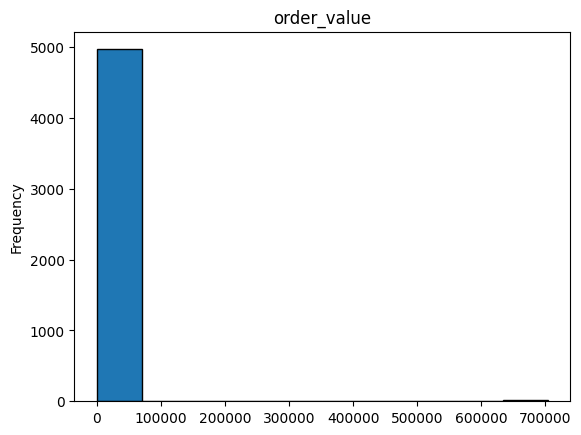

In [90]:
df.order_value.plot.hist(title="order_value", edgecolor="black")
# From this histogram, you can see a vast majority of the numbers are less than 100,000 but a few go over this threshold

In [91]:
# remove all orders over $20,000, this is likely recieving inventory, but not an order from a customer
# Very few orders were at this quantity and since the shoes are listed as relatively affordable, this could be the reason
# these large orders are not representative of the usual sales of these businesses, so we can see how the amount changes
# when these outliers are removed by now measure when the value is below $20,000
df = df[df['order_value'] < 20000]

In [92]:
totalOV = df["order_value"].sum()
totalOV

1493840

In [93]:
numOrders = df["order_id"].count()
numOrders

4937

In [113]:
newAOV = (totalOV / numOrders).round(2)
print("$",newAOV, ": is the new average order value, excluding the outlier cases.")

$ 302.58 : is the new average order value, excluding the outlier cases.


<Axes: title={'center': 'order_value'}, ylabel='Frequency'>

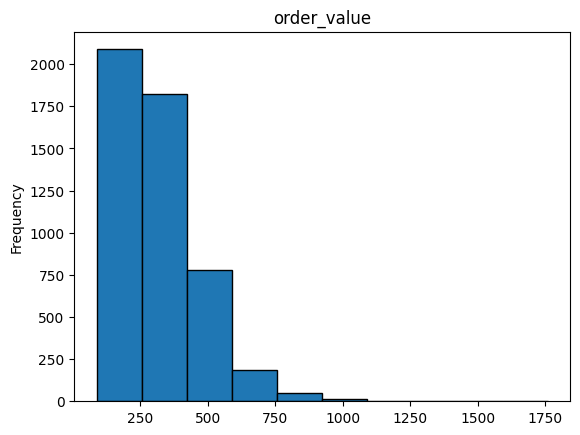

In [114]:
df.order_value.plot.hist(title="order_value", edgecolor="black")

In [115]:
df['created_at'] = pd.to_datetime(df.created_at, infer_datetime_format = True) 
display(df.head())

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
1862,1863,39,738,536,4,cash,2017-03-01
918,919,60,852,354,2,credit_card,2017-03-01
3327,3328,77,816,156,1,credit_card,2017-03-01
1260,1261,69,819,262,2,credit_card,2017-03-01
2858,2859,25,836,390,3,credit_card,2017-03-01


In [116]:
df['created_at'] = pd.to_datetime(df['created_at']).dt.round('D')

In [117]:
df.sort_values(by = 'created_at', ascending = True, inplace = True) 
display(df.head())

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
1862,1863,39,738,536,4,cash,2017-03-01
1270,1271,57,743,294,2,cash,2017-03-01
1741,1742,39,910,268,2,cash,2017-03-01
3228,3229,97,912,324,2,cash,2017-03-01
2689,2690,49,799,258,2,credit_card,2017-03-01


In [133]:
numDates = df['created_at'].value_counts()
numDates.mean()

159.25806451612902

<Axes: title={'center': 'Order numbers per day in march'}, xlabel='Day of the month', ylabel='Number of Orders'>

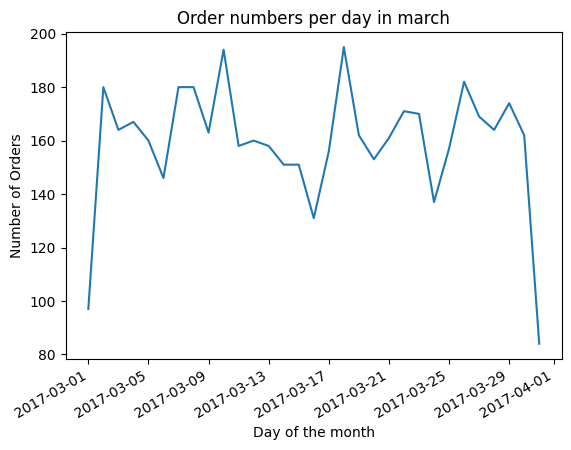

In [132]:
numDates.plot(title = "Order numbers per day in march", xlabel = "Day of the month", ylabel = "Number of Orders")

**Customers Purchase pattern fluctuated throughout the month of March. On certain days such as March 9th and March 17th, the number of orders spiked. This may be due to St. Patricks day, (Also my mom's birthday lol). In the days leading up to the 17th, orders were low at less than 140, when the mean is just under 160. This chart shows a patter of 2 spikes, and 3 dips, but the purchasing pattern doesn't seem fixed. I don't think many relations can be derived from this graph since it doesn't provide many insights into why it may have increased or decreased, the only useful info for the shoe stores, may be when to stock up, around a holiday like St.Patrcks so they don't run into inventory issues.**